# Linear Regression


> ### $\hat y = a + b*X$
    b = coefficient
    a = intercept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import shapiro
import statsmodels.formula.api as smf
import statsmodels.api as sm

# working on a car dataset which contains
- Time(hours)
- Number of Hits (Hits/hour)

In [2]:
sns.set(color_codes=True)

In [3]:
web = pd.read_csv('./dataset/web_traffic.tsv',sep='\t',header=None)
web.columns = ['Hours','Hits']
web.head()

,Hours,Hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [4]:
web.isnull().sum()

Hours    0
Hits     8
dtype: int64

-  **Replace Missing values with past value**
-  **Replace with next value**
-  **Replace with mean(previous,next)**
-  **Replace with mean (Hits)**

** Droping missing values**

In [5]:
web.dropna(inplace=True)
web.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


### Discriptive Stats

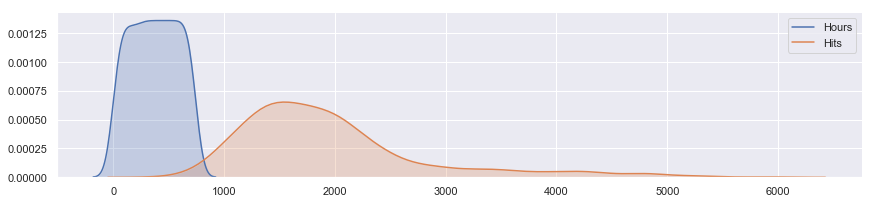

In [6]:
sns.FacetGrid(data=web, aspect = 4)
sns.kdeplot(data=web['Hours'],shade=True)
sns.kdeplot(data=web['Hits'],shade=True)


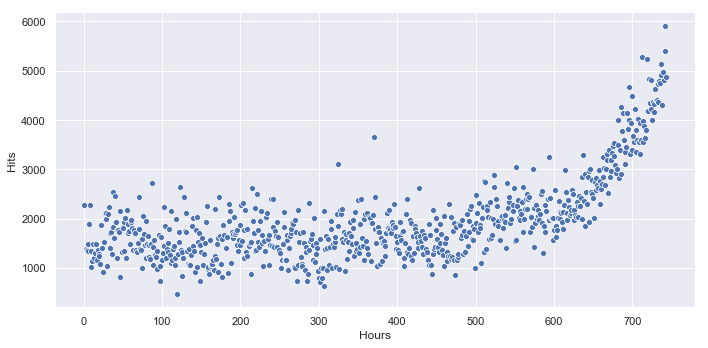

In [7]:
sns.relplot('Hours','Hits',data=web,kind='scatter',aspect=2)
plt.show()

In [8]:
web.keys()

Index(['Hours', 'Hits'], dtype='object')

In [9]:
model = smf.ols(formula="Hits~Hours",data=web)
results = model.fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     522.8
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           9.14e-88
Time:                        10:44:53   Log-Likelihood:                -5811.5
No. Observations:                 735   AIC:                         1.163e+04
Df Residuals:                     733   BIC:                         1.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    989.0249     48.994     20.187      0.0

In [21]:
Hits = 100000

Hours = (Hits - 989)/2.5962
print('INFO: Hours to get %s hits = %0.2f Weeks'%(Hits,(Hours/(24*7))))

INFO: Hours to get 100000 hits = 227.01 Weeks


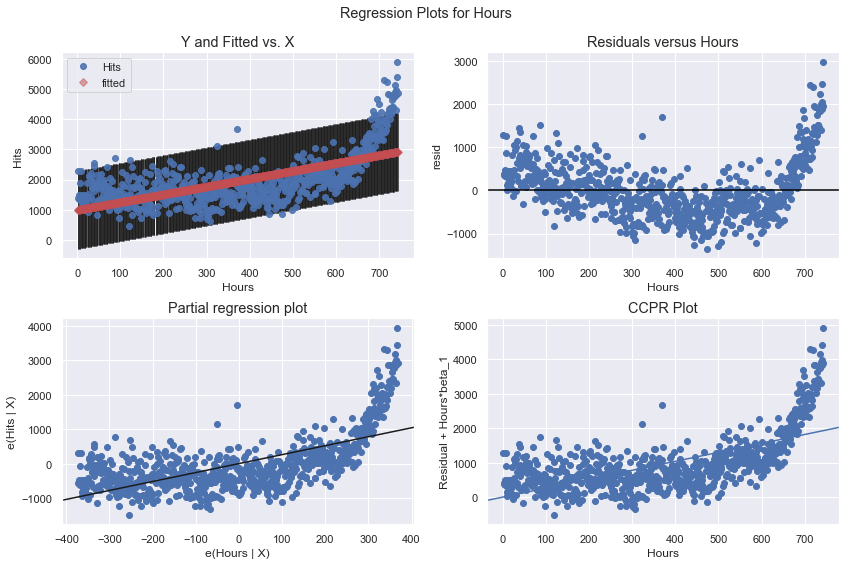

In [12]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'Hours',fig=fig)

## Residual Analysis

INFO: Normal test p-value = (0.9517814517021179, 9.018156501509195e-15)


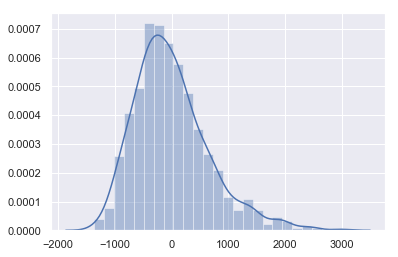

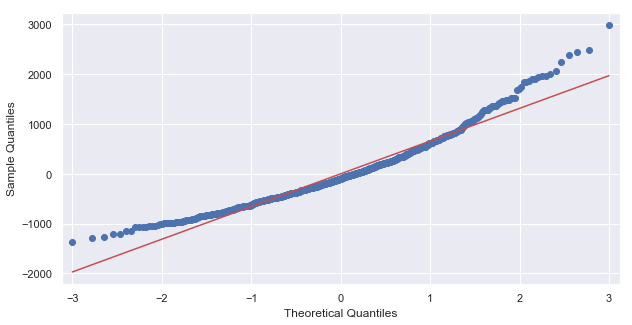

In [13]:
residual = results.resid
sns.distplot(residual)
pvalue = shapiro(residual)
print('INFO: Normal test p-value =', pvalue)
fig,ax = plt.subplots(figsize=(10,5))
fig= sm.graphics.qqplot(residual,line='s',ax =ax)

**$H_0$ :  Normal distribution** : P-value > 0.05

**$H_A$ :  Not Normal distribution** P-value < 0.05


In [14]:
web.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


### Non Linearity in the data

In [15]:
web['Hours_sqr'] = web['Hours'] ** 2
web.head()

,Hours,Hits,Hours_sqr
0,1,2272.0,1
2,3,1386.0,9
3,4,1365.0,16
4,5,1488.0,25
5,6,1337.0,36


In [16]:
model_1 = smf.ols(formula="Hits~Hours_sqr",data=web).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     943.2
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          8.72e-134
Time:                        10:45:08   Log-Likelihood:                -5705.4
No. Observations:                 735   AIC:                         1.141e+04
Df Residuals:                     733   BIC:                         1.142e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1233.0072     31.703     38.892      0.0

In [19]:
Hits = 100000

Hours = np.sqrt((Hits - 1233.0072)/0.0039)
print('INFO: Hours to get %s hits = %0.2f weeks'%(Hits,(Hours/(24*7))))

INFO: Hours to get 100000 hits = 29.95 weeks


### Residual Analysis

In [39]:
hours_sqr = web['Hours_sqr']
Hits =  1233.0072 + 0.0039* hours_sqr
residual = web['Hits'] - Hits

In [42]:
web['Pred_hours2'] = Hits
web['residual2'] = residual

In [43]:
web.head()

,Hours,Hits,Hours_sqr,Pred_hours2,residual2
0,1,2272.0,1,1233.0111,1038.9889
2,3,1386.0,9,1233.0423,152.9577
3,4,1365.0,16,1233.0696,131.9304
4,5,1488.0,25,1233.1047,254.8953
5,6,1337.0,36,1233.1476,103.8524


INFO: Normal test p-value = (0.9517814517021179, 9.018156501509195e-15)


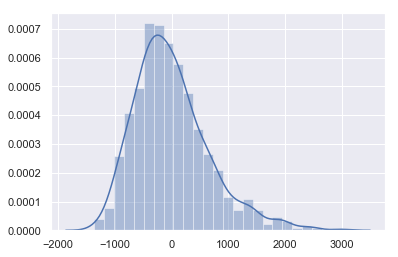

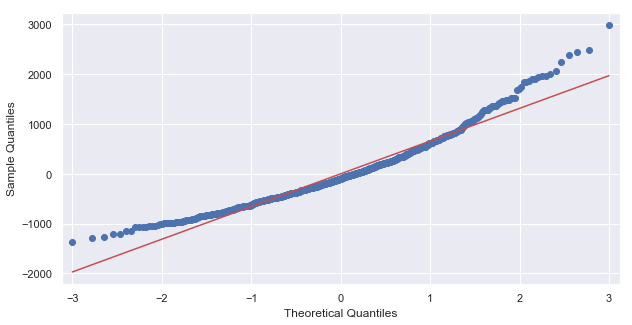

In [22]:
sns.distplot(residual)
pvalue = shapiro(residual)
print('INFO: Normal test p-value =', pvalue)
fig,ax = plt.subplots(figsize=(10,5))
fig= sm.graphics.qqplot(residual,line='s',ax =ax)

In [23]:
model_1 = smf.ols(formula="Hits~Hours+Hours_sqr",data=web).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     739.8
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          1.78e-176
Time:                        10:53:43   Log-Likelihood:                -5603.0
No. Observations:                 735   AIC:                         1.121e+04
Df Residuals:                     732   BIC:                         1.123e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1974.7608     55.694     35.457      0.0

In [24]:
hours = web['Hours']
Hits =  1974.76 -5.265*hours + 0.0105* hours**2
residual = web['Hits'] - Hits

INFO: Normal test p-value = (0.980402946472168, 2.344716243385392e-08)


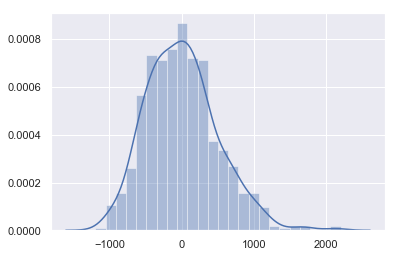

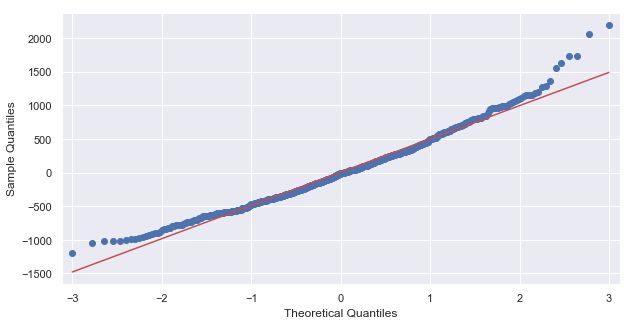

In [26]:
sns.distplot(residual)
pvalue = shapiro(residual)
print('INFO: Normal test p-value =', pvalue)
fig,ax = plt.subplots(figsize=(10,5))
fig= sm.graphics.qqplot(residual,line='s',ax =ax)

In [29]:
web['Hours_cube'] = web['Hours'] ** 3
web.head()

,Hours,Hits,Hours_sqr,Hours_cube
0,1,2272.0,1,1
2,3,1386.0,9,27
3,4,1365.0,16,64
4,5,1488.0,25,125
5,6,1337.0,36,216


In [30]:
model_1 = smf.ols(formula="Hits~Hours+Hours_sqr+Hours_cube",data=web).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     707.2
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          1.40e-215
Time:                        11:01:06   Log-Likelihood:                -5509.0
No. Observations:                 735   AIC:                         1.103e+04
Df Residuals:                     731   BIC:                         1.104e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1333.2880     65.843     20.249      0.0

In [49]:
web['Hours_6'] = web['Hours'] ** 5

In [50]:
web.head(2)

,Hours,Hits,Hours_sqr,Hours_cube,Hour_4,Hours_5,Hours_6
0,1,2272.0,1,1,1,1,1
2,3,1386.0,9,27,81,243,243


In [53]:
coef

Intercept     1.501743e+03
Hours_cube    1.926657e-05
Hour_4       -7.654618e-08
Hours_5      -1.216357e-01
Hours_6       1.216357e-01
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     806.0
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          2.87e-231
Time:                        11:16:42   Log-Likelihood:                -5472.7
No. Observations:                 735   AIC:                         1.095e+04
Df Residuals:                     731   BIC:                         1.097e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1501.7429     30.996     48.449      0.0

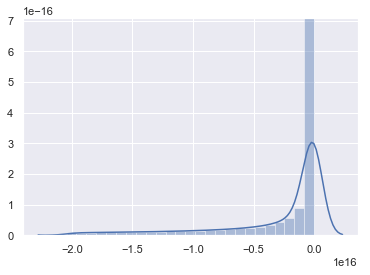

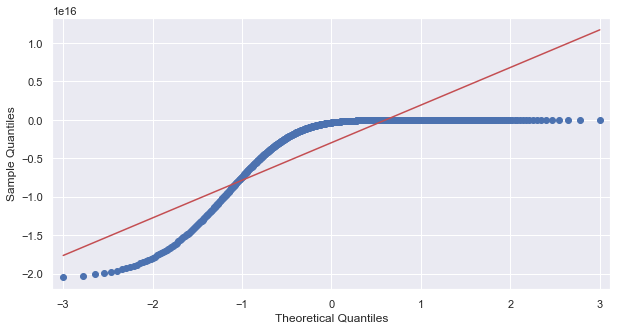

In [55]:
model_1 = smf.ols(formula="Hits~Hours_cube+Hour_4+Hours_5+Hours_6",data=web).fit()
print(model_1.summary())
coef = model_1.params
hours = web['Hours']
hits = coef[0] + coef[1] * hours**3 + coef[2]* hours**4 + coef[3]*hours**5 + coef[4]*hours**6
residual = web['Hits'] - hits
sns.distplot(residual)
pvalue = shapiro(residual)
print('INFO: Normal test p-value =', pvalue)
fig,ax = plt.subplots(figsize=(10,5))
fig= sm.graphics.qqplot(residual,line='s',ax =ax)